<a href="https://colab.research.google.com/github/zulatopaula/MVP_CD_BankChurn/blob/main/PZ_MVP_CD_BankChurn_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Machine Learning & Analytics
## Profs. Tatiana Escovedo, Hugo Villamizar e Patrick Happ
### Aluna: Paula Zulato

# 1. Definição do Problema

## Primeiros Passos
Nesta sprint do curso de Ciências de Dados, temos a opção de criar um novo projeto à partir de um dataset novo ou dar continuidade ao projeto da sprint anterior, agora com uma roupagem avançada usando Machine Learning ou Deep Learning. Eu optei por dar continuidade ao projeto anterior de Customer Churn usando Machine Learning. Portanto, apresentarei aqui de forma resumida algumas informações obtidas durante a análise exploratória naquela etapa, de modo a contextualizar o antigo projeto e como trabalharei na sprint atual. O projeto anterior pode ser encontrado na íntegra em https://colab.research.google.com/github/zulatopaula/MVP_CD_BankChurn/blob/main/PZ_MVP_CD_BankChurn.ipynb

## Customer Churn
Todo empresa quer manter seus clientes para sustentar seus negócios e com um banco não é diferente. Adquirir novos clientes tem um alto custo, normalmente maior que o custo de reter um cliente.
Abaixo estão os dados dos clientes do ABC Multinational Bank e o objetivo da análise dos dados será prever a rotatividade de clientes (Churn Prediction).


*"O Churn é uma métrica que indica o quanto sua empresa perdeu de receita ou clientes. Para calcular o Churn, basta dividir a quantidade de clientes que perdeu até o final do período pelo total de clientes que iniciaram. Exemplo: se você perdeu 10 clientes de 100 = 10% de Churn Rate" (Fonte: https://resultadosdigitais.com.br/marketing/o-que-e-churn/).*

O dataset usado neste projeto será o Bank Customer Churn Data, com informações de correntintas do banco ABC Multinacional Bank referente a um período de um mês (31/07/2022 a 29/08/2022). O dataset apresenta diversos atributos relacionados a dados de cliente, os produtos bancários consumidos por estes clientes e o balanço da conta bancária. Também possui uma variável de classe binária (0 ou 1) que indica se em algum momento este cliente já deixou o banco por algum período (1) ou se ele nunca deixou o banco (0). Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset/data

**Informações sobre os atributos:**

1. **customer_id** - Identificador único do cliente
2. **credit_score** - Valor numérico que indica a saúde de crédito de um cliente, geralmente emitido por um Bureau de Crédito
3. **country** - País de Origem de um cliente
4. **gender** - Identificação de gênero do cliente
5. **age** - Idade do cliente em anos
6. **tenure** - Tempo de existência da conta em anos
7. **balance** - Valor monetário total de depósito em conta
8. **products_number** - A quantidade de produtos do banco que um cliente possui
9. **credit_card** - Indica se o cliente possui cartão de crédito (1) ou não (0)
10. **active_member** - Indica se o cliente está ativo (1) ou não (0)
11. **estimated_salary** - Salário estimado do cliente
12. **churn** - Indica se o cliente já deixou a base em algum momento (1) ou não (0)

O objetivo deste estudo é realizar a análise e preparar os dados para solucionar um problema de Aprendizado Supervisionado utilizando Machine Learning e um método de Regressão para auxiliar na previsões de clientes propensos a deixarem a base (Churn Prediction) para quem interessar tratar posteriormente tomar ações de retenção de clientes (Churn Prevention).

Como premissas ou hipóteses sobre este problemas, poderíamos prever que o Churn de o cliente pode ser gerado por exemplo por questões econômicas como por exemplo a faixa salarial, ou pode estar relacionado a idade do cliente onde os mais jovens ou mais velhos podem ter uma frequência de abandono maior por ter uma renda não tão previsível ou que está ainda em crescimento (no caso dos mais jovens) ou em declínio (no caso dos mais velhos). O baixo Score de Crédito também pode ser um motivo para o Churn. Considerando estas hipóteses, seguirei para a análise dos dados.



---


# 2. Importação de Dados
Import de bibliotecas (Libraries) que serão utilizadas durante o projeto e configuração de filtro de warnings.

In [469]:
# Imports Libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as mplt
import seaborn as sbn
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from imblearn import under_sampling, over_sampling #Utilizada para fazer o balanceamento de dados
from imblearn.over_sampling import SMOTE #Utilizada para fazer o balanceamento de dados
import joblib # Utilizado para salvar o modelo preditivo
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [470]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

Carregamento de dados de um arquivo do tipo CSV com cabeçalhos diponíveis, usando a Library Pandas (Python Data Analysis Library). Exibição dos tipos de colunas utilizando os dados em formato raw armazenados no GitHub.

In [471]:
# Import através de URL
url = "https://raw.githubusercontent.com/zulatopaula/MVP_CD_BankChurn/main/Bank_Customer_Churn_Prediction.csv"

# Carga do dataset através da url
# Há diversos atributos no arquivo csv que podem ser interessantes. Eu optei por utilizar todos
dataset = pd.read_csv(url, delimiter=',', on_bad_lines='skip')

# Exibindo as primeiras linhas
dataset.head()


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



---


#3. Análise de Dados


###3.1. Estatísticas Descritivas

Explorando o Dataset para conhecê-lo melhor.

In [472]:
# Avaliando possível conteúdo  IsNull e IsNA
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


Aqui podemos identificar que a maioria dos atributos são inteiros ou float, ou seja, a maioria são atributos numéricos.

In [473]:
# Outra visão em contagem de isNull utilizando soma
print(dataset.isnull().sum())

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [474]:
# Validação de itens duplicados
dataset.duplicated().sum()

0

Percebemos que o conteúdo de NA ou ISNull para este dataset é vazio para todos os campos. O resultado da avaliação de duplicados é 0. Ou seja, temos um dataset de 10.000 linhas onde todas as colunas são preenchidas e nenhuma linha está duplicada.

In [475]:
# Resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Analisando o resumo estatístico podemos perceber que:

*   Os campos com valor mínimo zero não indicam serem valores nulos, visto que para todos eles é possível que o valor seja zero e não nulo ('Ternure" = cliente com menos de 1 ano na base, 'Balance' = cliente com saldo zero em conta).
*   Mais pra frente farei uma avalição mais profunda em relação a ocorrência de Balance 0.
*   Para os demais campos os valores mínimo igual a zero
encontrados podem estar sendo tratados como encoding ou são binários, como 'Credit_Card' ou 'Churn', visto que seus valores máximo são iguais a 1.
*   O valor mínimo para 'Age' é 18, o que é possível considerando que esta deve ser a idade mínima Mundial considerada para que alguém possa abrir uma conta bancária.





Avaliando a distribuição por Gênero (gender), por Idade (age) e por Churn (churn), com o intuito de medir o balanceamento do dataset.

In [476]:
# Distribuição por gêneros
print(dataset.groupby('gender').size())

gender
Female    4543
Male      5457
dtype: int64


In [477]:
# Distribuição por idade
print(dataset.groupby('age').size())

age
18    22
19    27
20    40
21    53
22    84
      ..
83     1
84     2
85     1
88     1
92     2
Length: 70, dtype: int64


In [478]:
# Distribuição por churn
print(dataset.groupby('churn').size())

churn
0    7963
1    2037
dtype: int64


Podemos perceber que em relação ao Gênero existem 5457 Homens (Male) sobre uma base total de 10.000 clientes (55% Homens contra 45% Mulheres). Assim, podemos considerar que esta base em relação a Gênero está balanceada. Percebemos que em relação ao Churn existem 7963 clientes que nunca saíram da base (0 = Retained) e 2037 clientes que já cancelaram o serviço definitivamente ou por um período (1 = Churned). Assim podemos considerar que em relação a Churn esta é uma base desbalanceada (79.6% Retained e 20.4% Churned). Mais adiante farei uma análise mais aprofundada em relação ao Churn.
Fazendo uma avaliação em relação a idade, a análise é inconclusiva.

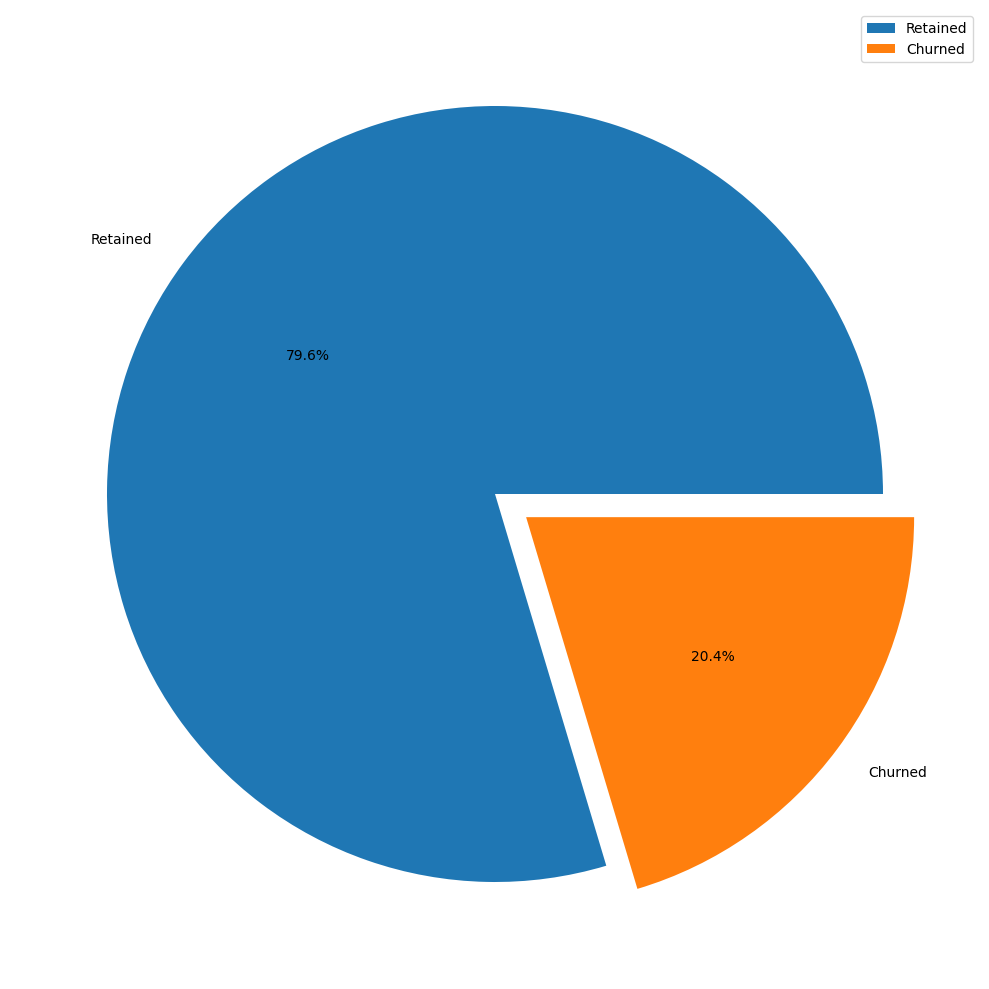

In [479]:
# Verificação do percentual de Churn and Retention
labels = 'Retained', 'Churned'
countchurn = dataset["churn"].value_counts().values
indexchurn = dataset["churn"].value_counts().index
mplt.pie(countchurn, labels=labels, explode= (0, 0.1), autopct='%1.1f%%')
mplt.legend()

Com esta visualização conseguimos perceber que quase 80% da base de clientes é fiel, ou seja, em nenhum momento deixou de ser cliente definitivamente ou por um período. Aqui, poderíamos realizar um benchmarking com este mercado para ter uma melhor análise e saber se 20% de Churn é esperado e considerado aceitável ou não para este tipo de mercado. Apesar disso, precisamos considerar que esta é uma variável desbalanceada e por ser esta provavelmente a variável alvo do modelo preditivo, precisaremos tratá-la antes de rodar o modelo na etapa de tratamento dos dados.

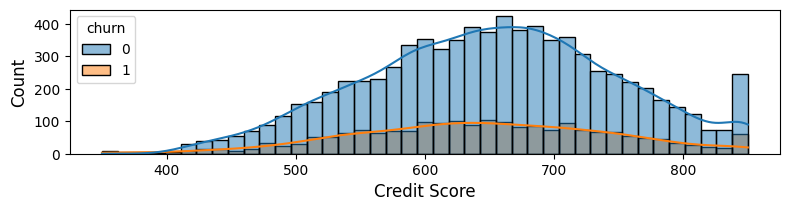

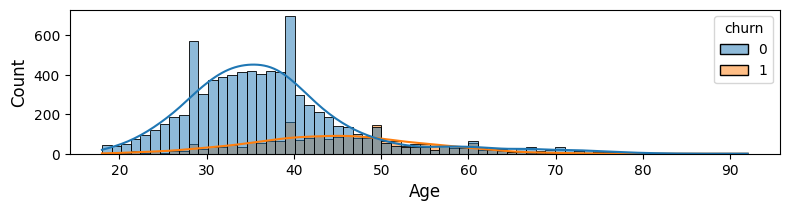

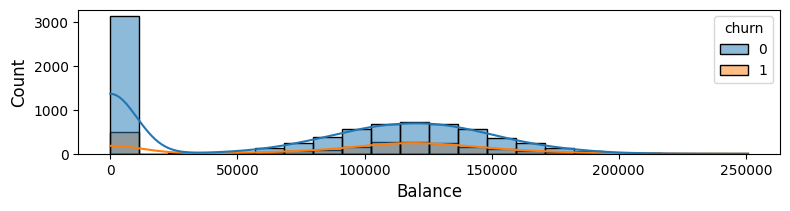

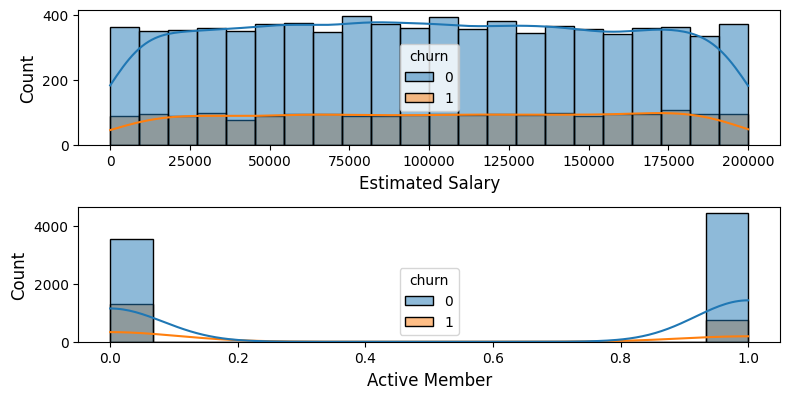

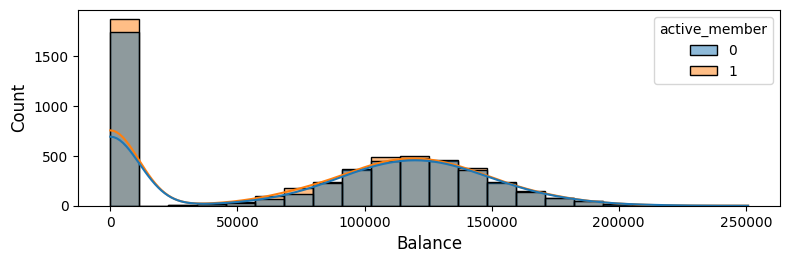

In [480]:
#Análise Quantitativa usando Churn como Hue para atributos de forma separada
# ('Credit_Score, 'Age', 'Balance'e 'Estimated_Salary)
mplt.figure(figsize=(8,10))
mplt.subplot(5,1,1)
sbn.histplot(dataset, x='credit_score', hue='churn', kde=True)
mplt.xlabel('Credit Score', fontsize=12)
mplt.ylabel('Count', fontsize=12)

mplt.figure(figsize=(8,10))
mplt.subplot(5,1,2)
sbn.histplot(dataset, x='age', hue='churn', kde=True)
mplt.xlabel('Age', fontsize=12)
mplt.ylabel('Count', fontsize=12)

mplt.figure(figsize=(8,10))
mplt.subplot(5,1,3)
sbn.histplot(dataset, x='balance', hue='churn', kde=True)
mplt.xlabel('Balance', fontsize=12)
mplt.ylabel('Count', fontsize=12)

mplt.figure(figsize=(8,10))
mplt.subplot(5,1,4)
sbn.histplot(dataset, x='estimated_salary', hue='churn', kde=True)
mplt.xlabel('Estimated Salary', fontsize=12)
mplt.ylabel('Count', fontsize=12)

mplt.subplot(5,1,5)
sbn.histplot(dataset, x='active_member', hue='churn', kde=True)
mplt.xlabel('Active Member', fontsize=12)
mplt.ylabel('Count', fontsize=12)

#Análise Quantitativa usando Active Member como Hue para atributo 'Balance' de forma separada
mplt.figure(figsize=(8,10))
mplt.subplot(4,1,1)
sbn.histplot(dataset, x='balance', hue='active_member', kde=True)
mplt.xlabel('Balance', fontsize=12)
mplt.ylabel('Count', fontsize=12)

mplt.show()

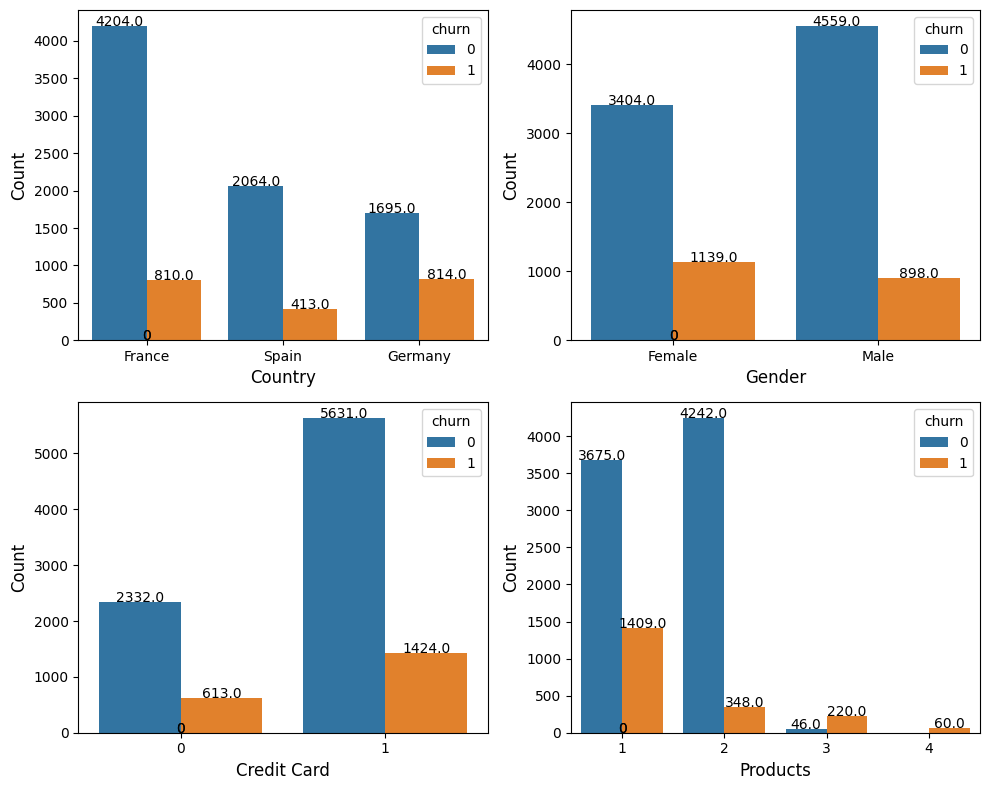

In [481]:
# Análise Qualitativa ou Categórica
# Explorando outras visões e atributos

mplt.figure(figsize=(10,8))

mplt.subplot(2,2,1)
cplot = sbn.countplot(data=dataset, x='country', hue='churn')
mplt.xlabel('Country', fontsize=12)
mplt.ylabel('Count', fontsize=12)
for x in cplot.patches:
  cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

mplt.subplot(2,2,2)
cplot = sbn.countplot(data=dataset, x='gender', hue='churn')
mplt.xlabel('Gender', fontsize=12)
mplt.ylabel('Count', fontsize=12)
for x in cplot.patches:
  cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

mplt.subplot(2,2,3)
cplot = sbn.countplot(data=dataset, x='credit_card', hue='churn')
mplt.xlabel('Credit Card', fontsize=12)
mplt.ylabel('Count', fontsize=12)
for x in cplot.patches:
  cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

mplt.subplot(2,2,4)
cplot = sbn.countplot(data=dataset, x='products_number', hue='churn')
mplt.xlabel('Products', fontsize=12)
mplt.ylabel('Count', fontsize=12)
for x in cplot.patches:
  cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

mplt.show()

Com esta análise qualitativa, podemos obter as seguintes informações:
*   A Alemanha (Germany) é o país com o maior número de Churn, porém tem valores quase iguais a França (France). A Espanha (Spain) é o país com menor Churn.
*   Mulheres representam um número maior de Churn que Homens. Esse é um número que pode ser interessante. Devemos lembrar que mais acima identificamos que a base está bem balanceada em relação ao Gênero.
*   O Churn é maior entre clientes que possuem Cartão de Crédito (Credit Card) e o valor é mais que o dobro que clientes que não possuem Cartão de Crédito.
*   A maioria do clientes possuem apenas 1 ou 2 produtos (cerca de 80% dos clientes). E cerca de 30% dos clientes que possuem apenas 1 produto
*   Os clientes com menor churn possuem 2 produtos. Cerca de 8% dos clientes que possuem 2 produtos entram em Churn.
*   Clientes que possuem 3 ou 4 produtos são os que mais entram em Churn (mais de 80% dos clientes que possuem 3 produtos e 100% dos clientes que possuem 4 produtos).










---


# 4.  Suposições e Premissas (Assumptions and Premisses)
Considero que para termos uma análise mais clara para termos uma tomada de decisão mais assertiva é necessário termos especialistas em alguns temas como Churn, Customer Success (Sucesso do Cliente), Mercado de Finanças e até mesmo um especialista do Banco em questão. Como este projeto tem fins didáticos, utilizarei algumas premissas e farei algumas suposições de acordo com as informações coletadas do projeto anterior, com o meu conhecimento de mercado e de algumas pesquisas antes de passar para a etapa de Pré-Processamento de Dados.

1.   Churn Rate: A taxa de Churn desta base é de cerca de
20%. O Churn Rate pode variar entre mercados. Segundo o site Resultados Digitais (https://resultadosdigitais.com.br/marketing/o-que-e-churn/), nos pequenos negócios (SMB) o Churn Rate tende a ser mais alto podendo atingir mais de 30% a.a no mercado SaaS SMB. No mercado Enterprise as taxas tendem a ser menores. Considerando que estamos falando de uma base de 10 mil clientes que abrange 3 países da Europa, um mercado muito menor que o Brasil e que o maior Tenure de cliente é de 10 anos. É possível que estejamos falando de um pequeno banco, talvez um banco digital e que esta taxa de Churn seja real. Outro fator a ser considerado é que a base em análise refere-se a um único mês do ano de 2022. O ano de 2022 ainda é o ano dois pós Pandemia da Covid19, onde alguns mercados ainda estavam sendo muito afetados economicamente. Alguns meses depois do período de referência desta base, houve a quebra de um importante banco no cenário mundial, o Silicon Valley Bank (SVB) conhecido por investir em startups. Outra questão é que a base tem uma amostragem de apenas um mês. Logo pode ter havido algum tipo de sazonalidade ou desequilibrio de mercado que possa ter gerado um aumento atípico para o Churn.
2.   Balance: Vimos nas análises que o Balance 0 de clientes abrange cerca de 30% da base. Levando em consideração que este possa ser um pequeno banco digital que pode ainda estar passando por rodadas de investimento, este percentual de clientes com Balance 0 pode ser real, visto que bancos nesta situação no Brasil utilizam-se do número total de clientes na base e não do número total de clientes ativos na base ou com movimentação de conta (Balance) para justificar seu crescimento em rodadas de investimento.
3.   Correlação de atributos "Churn" e "Age" (correlação positiva de 0.29): Podemos considerar que apesar de uma correlação positiva fraca, é provável que o Churn possa aumentar conforme o aumento da idade.
4.   Correlação de atributos "Churn" e "Balance" (correlação positiva de 0.12): Podemos considerar que apesar de uma correlação positiva fraca, é provável que o Churn possa aumentar conforme o Balance de conta aumente.
5. O Churn é maior entre clientes que possuem Cartão de Crédito (Credit Card) e o valor é mais que o dobro que clientes que não possuem Cartão de Crédito. Portanto, este pode ser um indicador importante para prever o Churn de clientes.
6. Os clientes com menor churn possuem 2 produtos. Apenas cerca de 8% dos clientes que possuem 2 produtos entram em Churn. Já os clientes que possuem 3 ou 4 produtos são os que mais entram em Churn (mais de 80% dos clientes que possuem 3 produtos e 100% dos clientes que possuem 4 produtos). Este também pode ser um indicador importante a ser considerado no modelo de predição.
7.   Credit Score: Segundo o site Experian um bom score pode variar considerando que existem diferentes bases de medição, uma delas é a FICO Score, utilizada nos Estados Unidos e que varia de 350 a 850 (https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-is-a-good-credit-score/). Em nossa análise identificamos que o range Score da base coincide com a FICO (menor 350 e maior 850). Assim podemos considerar entre 670 e 739 é um cliente de Bom Score de 740-799 é Muito Bom Score e acima disto é Excelente. A maioria dos clientes desta base possui 'Credit_Score' entre 600 e 700. A maioria do Churn acontece também para clientes com Score entre 600 e 700. Assim, um Score baixo não parece ter relação direta com o Churn. Considerando que o um score Muito Bom ou Excelente está na faixa acima de 740, este pode ser um indicador importante para prever o Churn de clientes.
8. Os clientes com menor churn possuem 2 produtos. Apenas cerca de 8% dos clientes que possuem 2 produtos entram em Churn. Já os clientes que possuem 3 ou 4 produtos são os que mais entram em Churn (mais de 80% dos clientes que possuem 3 produtos e 100% dos clientes que possuem 4 produtos). Este também pode ser um indicador importante a ser considerado no modelo de predição.
Analisando a variável Churn, percebe-se que ela tem uma distribuição muito desbalanceada. O que pode afetar um possível modelo preditivo de Churn.
9. A taxa de churn para o Gênero Feminino é maior que no para o Masculino, cerca de 56% maior do total de Churn.
A Alemanha é onde ocorre a maior taxa de Churn. A Espanha tem o menor Churn, cerca de 50% menor que a Alemanha. Além de ser um indicador importante para a predição, este pode ser um fator importante a ser considerado na avaliação para a melhoria dos serviços para o cliente para redução de Churn em outros países.
10. A estimativa de salário aparentemente não influencia ou de alguma forma não tem informações suficientes para ser um indicador para a predição de Churn.

Além dos dados relativos a base de dados de estudo, um bom conhecimento do mercado e a análise de momento do estudo e da região e economia, podem ser informações relevantes. Eu considerei algumas premissas para esta avaliação, certamente elas não são exaustivas, mas podem dar um melhor direcionamento para a criação de um modelo preditivo mais assertivo.








---
# 5. Pré-Processamento de Dados

Etapa de preparação de dados, como por exemplo, tratamento de valores missings (faltantes) ou limpeza de dados.


### 5.1. Tratamento de Missings e Limpeza

Observamos na etapa de Análise de Dados que o dataset Bank Churn não tem missings aparentes, nem valores "0" que possam aparentar serem missings. Entendo que o campo 'balance' pode realmente conter o valor 0 considerando que em algum momento o cliente pode simplesmente não ter valor em conta. Considerei também aqui os motivos citados na sessão Suposições e Premissas. Criarei um novo dataset apenas por precaução e antecipação para a próxima etapa de separação em conjuntos de training e teste. Removerei a coluna 'customer_id', pois considero que esta não é uma informação relante para a análise e com o intuito de tornar o dado ainda mais anonimizado e o rol de análise menor e portanto mais leve para o Modelo Preditivo. Removerei também as colunas 'age' e 'tenure' após transformar os dados das mesmas em faixas para reduzir o volume dos dados a serem manipulados pelo modelo. Nenhuma outra coluna e nenhuma linha serão removidas, pois entendo que todos os atributos atuais possam ser relevantes para uma futura análise preditiva. Entretanto irei rebalancear a variável alvo desta análise 'churn'.

Transformando dados das colunas 'age' e 'tenure' em faixas de dados para reduzir o volume dos dados a serem manipulados pelo modelo.



In [482]:
# Criando uma faixa de idade (age)
bins = [-100, 25, 35, 50, 60, 70, 80, 90, 100]
labels = ['De 0 até 25 anos', 'De 26 até 35 anos','De 35 até 50 anos','De 51 até 50 anos', 'De 60 até 70 anos','De 70 até 80 anos','De 80 até 90 anos','De 90 até 100 anos']
dataset['faixa_idade'] = pd.cut(dataset['age'], bins=bins, labels=labels)
pd.value_counts(dataset.faixa_idade)

faixa_idade
De 35 até 50 anos     4586
De 26 até 35 anos     3542
De 51 até 50 anos      797
De 0 até 25 anos       611
De 60 até 70 anos      331
De 70 até 80 anos      121
De 80 até 90 anos       10
De 90 até 100 anos       2
Name: count, dtype: int64

In [483]:
# Criando uma faixa de tempo de existência da conta em anos (tenure)
bins = [-100, 5, 10, 15]
labels = ['De 0 até 5 anos conta', 'De 6 até 10 anos de conta','De 11 até 15 anos de conta']
dataset['tempo_conta'] = pd.cut(dataset['tenure'], bins=bins, labels=labels)
pd.value_counts(dataset.tempo_conta)

tempo_conta
De 0 até 5 anos conta         5506
De 6 até 10 anos de conta     4494
De 11 até 15 anos de conta       0
Name: count, dtype: int64

<Axes: >

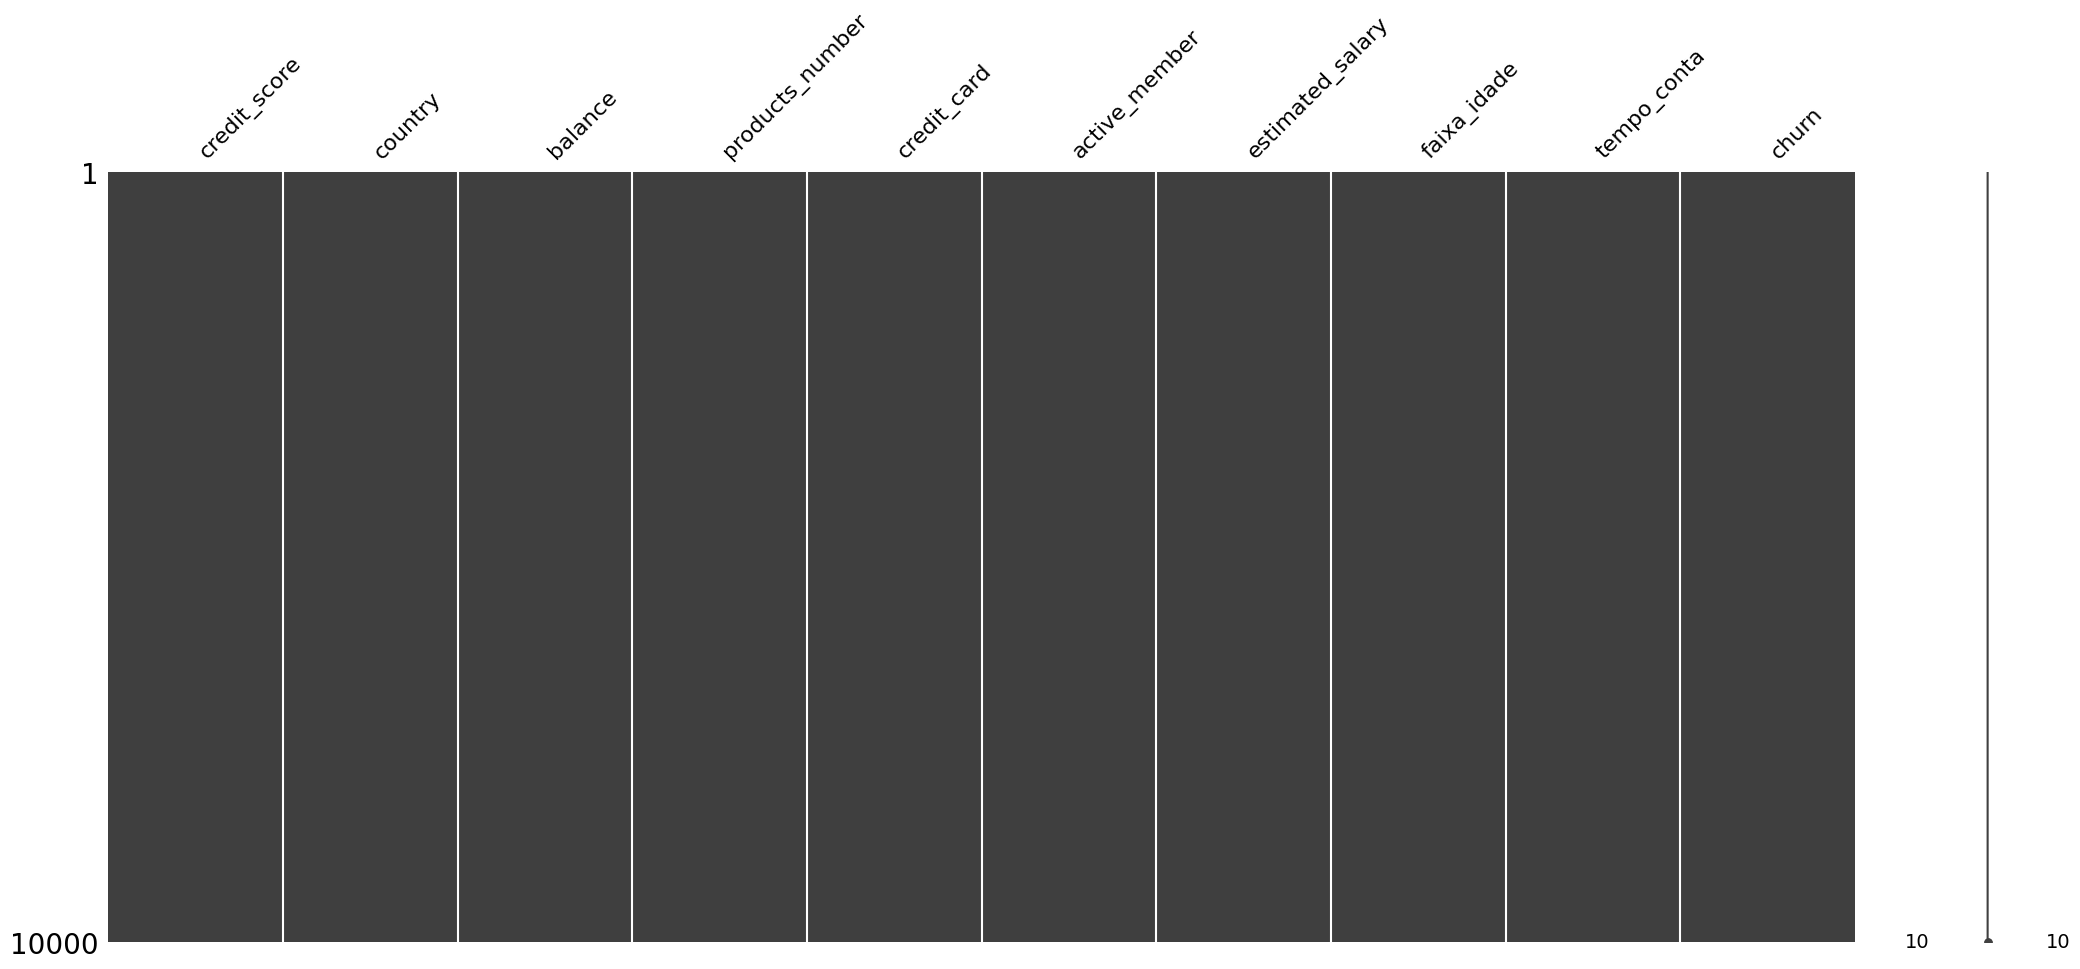

In [484]:
# Fazendo uma cópia do dataset para futura separação em conjuntos de Training / Test)

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas, com de 'customer_id', 'age' e 'tenure')
columns = ['credit_score', 'country', 'balance', 'products_number', 'credit_card', 'active_member',
           'estimated_salary', 'faixa_idade', 'tempo_conta', 'churn']

novodataset = pd.DataFrame(dataset, columns=columns)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(novodataset)

In [485]:
# Avaliando conteúdo
print(novodataset.info())

novodataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   credit_score      10000 non-null  int64   
 1   country           10000 non-null  object  
 2   balance           10000 non-null  float64 
 3   products_number   10000 non-null  int64   
 4   credit_card       10000 non-null  int64   
 5   active_member     10000 non-null  int64   
 6   estimated_salary  10000 non-null  float64 
 7   faixa_idade       10000 non-null  category
 8   tempo_conta       10000 non-null  category
 9   churn             10000 non-null  int64   
dtypes: category(2), float64(2), int64(5), object(1)
memory usage: 645.1+ KB
None


,credit_score,country,balance,products_number,credit_card,active_member,estimated_salary,faixa_idade,tempo_conta,churn
0,619,France,0.00,1,1,1,101348.88,De 35 até 50 anos,De 0 até 5 anos conta,1
1,608,Spain,83807.86,1,0,1,112542.58,De 35 até 50 anos,De 0 até 5 anos conta,0
2,502,France,159660.80,3,1,0,113931.57,De 35 até 50 anos,De 6 até 10 anos de conta,1
3,699,France,0.00,2,0,0,93826.63,De 35 até 50 anos,De 0 até 5 anos conta,0
4,850,Spain,125510.82,1,1,1,79084.10,De 35 até 50 anos,De 0 até 5 anos conta,0


Convertendo dados do dataset e usando encoding antes de realizar a Normalização de Dados

In [486]:
# Convertendo o Credit Score de Texto para Numérico
novodataset['credit_score'] = pd.to_numeric(novodataset['credit_score'])

# Enconding atributos Gender e Country
novodataset["faixa_idade"] = LabelEncoder().fit_transform(novodataset["faixa_idade"])
novodataset["tempo_conta"] = LabelEncoder().fit_transform(novodataset["tempo_conta"])
novodataset["country"] = LabelEncoder().fit_transform(novodataset["country"])
novodataset.head()

,credit_score,country,balance,products_number,credit_card,active_member,estimated_salary,faixa_idade,tempo_conta,churn
0,619,0,0.00,1,1,1,101348.88,2,0,1
1,608,2,83807.86,1,0,1,112542.58,2,0,0
2,502,0,159660.80,3,1,0,113931.57,2,1,1
3,699,0,0.00,2,0,0,93826.63,2,0,0
4,850,2,125510.82,1,1,1,79084.10,2,0,0


Como vimos na sessão "Suposições e Premissas", a variável alvo do nosso modelo preditivo está desbalanceada. Procederei então com o balanceamento antes de realizar o enconding e normalizaçÃo dos dados.

In [487]:
# Visualizando a quantidade da variável alvo (target)
variavel_target = novodataset.churn.value_counts()
variavel_target

churn
0    7963
1    2037
Name: count, dtype: int64

In [488]:
# Separando variáveis preditoras e target
predictors = novodataset.iloc[:,0:8]
target = novodataset.iloc[:,9]

# Visualizando as variáveis preditoras
predictors.head()

,credit_score,country,balance,products_number,credit_card,active_member,estimated_salary,faixa_idade
0,619,0,0.00,1,1,1,101348.88,2
1,608,2,83807.86,1,0,1,112542.58,2
2,502,0,159660.80,3,1,0,113931.57,2
3,699,0,0.00,2,0,0,93826.63,2
4,850,2,125510.82,1,1,1,79084.10,2


In [489]:
# Visualizando a variável alvo
target.head()

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

<Axes: title={'center': 'Churned X Retained'}, xlabel='churn'>

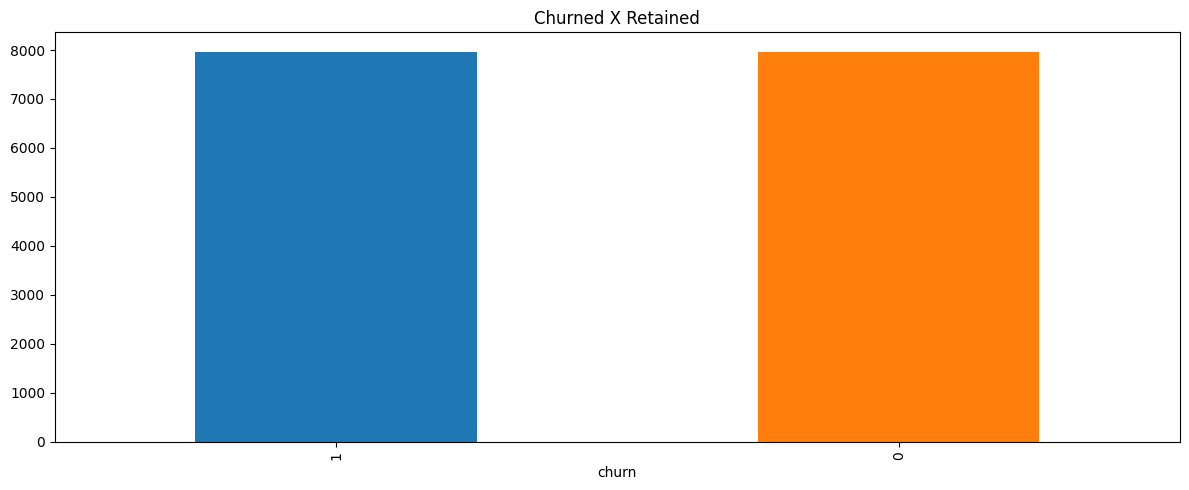

In [490]:
# Usando o método SMOTE da biblioteca skt_learn para balancear de forma automatizada os dados
# da variável target 'churn' usando os dados históricos para simular os novos dados

seed = 100
balanceador = SMOTE(random_state=seed)

# Aplica o balanceador
predictors_res, target_res = balanceador.fit_resample(predictors, target)

# Visualizando o balanceamento da variável target ('churn')
mplt.rcParams["figure.figsize"] = [12.00, 5.00]
mplt.rcParams["figure.autolayout"] = True
target_res.value_counts().plot(kind='bar', title='Churned X Retained' , color = ['#1f77b4', '#FF7F0E'])

### 5.2. Separação em conjunto de Training / Test

Usei aqui a estratégia train-test-split considerando 70% do conjunto de dados para modelagem (Training) e 30% do conjunto para validação (Test).


In [491]:
# Separação em conjuntos de treino e teste
# usando as variáveis que anteriormente foram separadas em preditoras e target

X_train, X_test, Y_train, Y_test = train_test_split(predictors_res, target_res, test_size = 0.3, random_state = 42)

In [492]:
# Usando Normalização de Dados

# Definindo o transformador como min max scaler
scaler = MinMaxScaler()

# Transformando os dados

scaled = scaler.fit_transform(X_train)
scaled = scaler.fit_transform(X_test)
print(scaled)

[[0.37       0.         0.         ... 1.         0.26327756 0.14285714]
 [0.512      0.5        0.59484845 ... 0.         0.78246647 0.28571429]
 [0.66       1.         0.53725693 ... 1.         0.50559193 0.14285714]
 ...
 [0.66       0.         0.         ... 0.         0.30596334 0.28571429]
 [0.43       0.         0.4076371  ... 0.         0.95501879 0.28571429]
 [0.596      0.5        0.4840702  ... 0.         0.93238143 0.28571429]]


# 6. Criando e treinando um modelo preditivo

## 6.1 Criando um modelo

In [493]:
# Criando um modelo usando o classificador Random Forest
classificador = RandomForestClassifier(n_estimators = 300)

# Rodando o modelo
classificador = classificador.fit(X_train, Y_train)

#Verificando a acurácia do modelo com dados de teste
scores = classificador.score(X_test, Y_test)
scores

0.8269150272080369

Text(0.5, 1.0, 'Importância de cada variável')

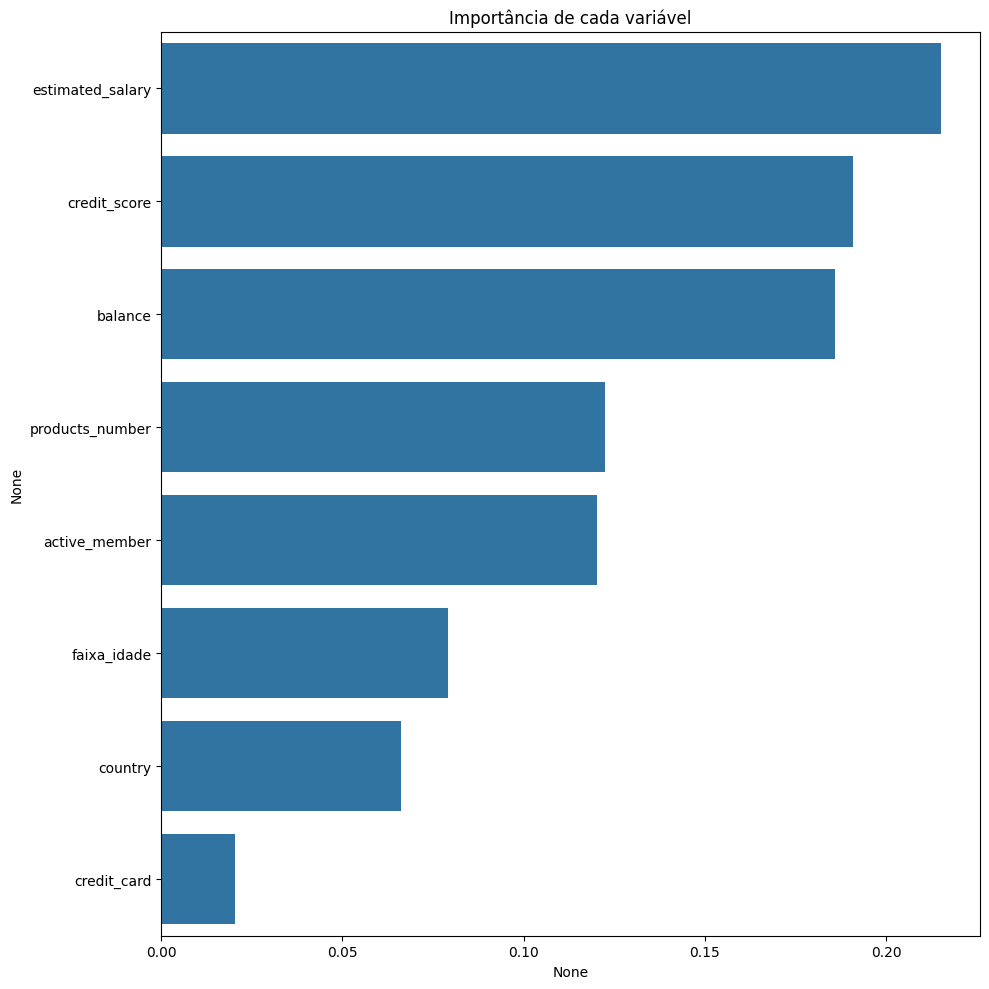

In [494]:
#Exibindo a importância de cada variável no modelo preditivo
mplt.rcParams["figure.figsize"] = [10.00, 10.00]
mplt.rcParams["figure.autolayout"] = True

# mostra qual variável teve mais importância no modelo
importances = pd.Series(data=classificador.feature_importances_, index=predictors.columns)
importances = importances.sort_values(ascending = False)
sbn.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada variável')

In [495]:
# Salvando o modelo preditivo criado e treinado
joblib.dump(classificador, 'modelo_treinado.pk')

['modelo_treinado.pk']



---
# 7. Conclusão

O objetivo desta análise foi entender quais as atributos/variávies podem estar relacionadas ao Churn. O intuito aqui é dar direcionamento para uma possível próxima etapa de geração de um Modelo Preditivo.

Podemos concluir que:

1.   A maioria dos clientes possui 'Credit_Score' entre 600 e 700. A maioria do Churn acontece também para clientes com Score entre 600 e 700. Considerando que o um score Muito Bom ou Excelente está na faixa acima de 740, este pode ser um indicador importante para prever o Churn de clientes.
2.   A correlação de atributos "Churn" e "Age" é positiva de 0.29. Assim podemos considerar que apesar de uma correlação positiva fraca, é provável que o Churn possa aumentar conforme o aumento da idade. Portanto, este pode ser um indicador importante para prever o Churn de clientes.
3.   A correlação de atributos "Churn" e "Balance" é positiva de 0.12. Podemos considerar que apesar de uma correlação positiva fraca, é provável que o Churn possa aumentar conforme o Balance de conta aumente. Portanto, este pode ser um indicador importante para prever o Churn de clientes.
4.   O Churn é maior entre clientes que possuem Cartão de Crédito (Credit Card) e o valor é mais que o dobro que clientes que não possuem Cartão de Crédito. Portanto, este pode ser um indicador importante para prever o Churn de clientes.
5.   Os clientes com menor churn possuem 2 produtos. Apenas cerca de 8% dos clientes que possuem 2 produtos entram em Churn. Já os clientes que possuem 3 ou 4 produtos são os que mais entram em Churn (mais de 80% dos clientes que possuem 3 produtos e 100% dos clientes que possuem 4 produtos). Este também pode ser um indicador importante a ser considerado no modelo de predição.
6.   Analisando a variável Churn, percebe-se que ela tem uma distribuição muito desbalanceada. O que pode afetar um possível modelo preditivo de Churn.
7.   A taxa de churn para o Gênero Feminino é maior que no para o Masculino, cerca de 56% maior do total de Churn.
8.   A Alemanha é onde ocorre a maior taxa de Churn. A Espanha tem o menor Churn, cerca de 50% menor que a Alemanha. Além de ser um indicador importante para a predição, este pode ser um fator importante a ser considerado na avaliação para a melhoria dos serviços para o cliente para redução de Churn em outros países.
9.   A estimativa de salário aparentemente não influencia ou de alguma forma não tem informações suficientes para ser um indicador para a predição de Churn.
10.  Além dos dados relativos a base de dados de estudo, um bom conhecimento do mercado e a análise de momento do estudo e da região e economia, podem ser informações relevantes. Eu considerei algumas premissas para esta avaliação, certamente elas não são exaustivas, mas podem dar um melhor direcionamento para a criação de um modelo preditivo mais assertivo.